## Contents

#### In this notebook '02_Modeling_Conclusions' :
- [Preprocessing](#Preprocessing)
- [Modeling](#Modeling)
- [Model Evaluation](#Model-Evaluation)
- [Prediction](#Prediction)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)

# 3. Preprocessing

#### In general, we need to take approches to preprocess data for before fitting a Linear Regression model: 


- Linear Regression only takes numerical values to model

1.  Check if the numerical features are meaningful to the model. For instance, locational features with numercial input should be removed. 
2.  Categorical features (nominal and ordinal) will be converted into numerical representations by the means of One Hot Encoding (binarize the category into an array of 1 and 0 to represent the feature) or Ordinal Encoding (convert category to numerical values which retains the order of category).

- Selection of significant features

1.  Remove features with majority counts for a single category. This feature may not provide extra information as most data falls under the same category.
2.  Regularization using Lasso, Ridge and Elastic Net to penalize unnecessary features is important.

In [124]:
# again, import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# read the files
df = pd.read_csv('../datasets/train_bf_preprocessing.csv', low_memory=False)
df_pred = pd.read_csv('../datasets/test_bf_preprocessing.csv', low_memory=False)

In [128]:
# look at the shape of the training data:
df.shape

(150634, 72)

In [129]:
# look at the shape of the predict data:
df_pred.shape

(16737, 71)

In [130]:
# list the column names for feature engineering:
df.columns

Index(['Unnamed: 0', 'id', 'Tranc_YearMonth', 'town', 'flat_type', 'block',
       'street_name', 'storey_range', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'Tranc_Year', 'Tranc_Month',
       'mid_storey', 'lower', 'upper', 'mid', 'full_flat_type', 'address',
       'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed',
       'residential', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'Latitude', 'Longitude', 'planning_area',
       'Mall_Nearest_Distance', 'Hawker_Nearest_Distance',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'mrt_name', 'bus_interchange', 'mrt_interchange', 'mrt_latitude',
       'mrt_longitude', 'bus

- Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical: `id`,`mrt_name`, `pri_sch_name`, `sec_sch_name`
- Drop locational features: `address`, `block`,`street_name`, `postal`, `Latitude`, `Longitude`, `mrt_latitude`, `mrt_longitude`,`bus_stop_latitude`, `bus_stop_longitude`, `pri_sch_latitude`, `pri_sch_longitude`, `sec_sch_latitude`, `sec_sch_longitude`.
- Drop redundant features: `floor_area_sqft` (while keeping `floor_area_sqm`), `Tranc_YearMonth` (while keeping `Tranc_Year` and `Tranc_Month`), `residential`, (while keeping `commercial`), drop `storey_range`, `lower`, `upper`, `mid` (while keeping `mid_storey`), `full_flat_type` (while keeping `flat_type`, `flat_model`), `hdb_age` , `year_completed` (while keeping `lease_commence_date`)
- Drop features with insufficient value counts: `1room_rental`,	`2room_rental`,	`3room_rental`,	`other_room_rental`

In [131]:
df.drop(columns = [

# Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical:  
    'Unnamed: 0', 'id', 'mrt_name', 'pri_sch_name', 'sec_sch_name', 'bus_stop_name',
    
# Drop locational features: 
    'address', 'block','street_name', 'postal', 'Latitude', 'Longitude', 
    'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude', 
    'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude',

# Drop redundant features:
    'floor_area_sqft', # keep floor_area_sqm
    'Tranc_YearMonth', # keep Tranc_Year and Tranc_Month
    'residential', # keep commercial
    'storey_range', 'lower', 'upper', 'mid', # keep mid_storey, 
    'full_flat_type', # keep flat_type, flat_model, 
    'hdb_age', 'year_completed', # keep lease_commence_date

# Drop features with insufficient value counts: 
    '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'

], axis=1, inplace=True )

In [ ]:
# do exactly the same for predict data:

df_pred.drop(columns = [

# Drop features that are irrelevant to our study of flat prices regardless if they're categorical or numerical: 
    'Unnamed: 0', 'id', 'mrt_name', 'pri_sch_name', 'sec_sch_name', 'bus_stop_name',
    
# Drop locational features: 
    'address', 'block','street_name', 'postal', 'Latitude', 'Longitude', 
    'mrt_latitude', 'mrt_longitude','bus_stop_latitude', 'bus_stop_longitude', 
    'pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude',

# Drop redundant features:
    'floor_area_sqft', # keep floor_area_sqm
    'Tranc_YearMonth', # keep Tranc_Year and Tranc_Month
    'residential', # keep commercial
    'storey_range', 'lower', 'upper', 'mid', # keep mid_storey, 
    'full_flat_type', # keep flat_type, flat_model, 
    'hdb_age', 'year_completed', # keep lease_commence_date

# Drop features with insufficient value counts: 
    '1room_rental', '2room_rental', '3room_rental', 'other_room_rental'

], axis=1, inplace=True )

#### Check the dataframe shape after dropping the irrelevant features:

In [134]:
df.shape

(150634, 38)

In [135]:
df_pred.shape

(16737, 37)

#### Identify categorical features and numerical features:

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   town                       150634 non-null  object 
 1   flat_type                  150634 non-null  object 
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   lease_commence_date        150634 non-null  int64  
 5   resale_price               150634 non-null  float64
 6   Tranc_Year                 150634 non-null  int64  
 7   Tranc_Month                150634 non-null  int64  
 8   mid_storey                 150634 non-null  int64  
 9   max_floor_lvl              150634 non-null  int64  
 10  commercial                 150634 non-null  object 
 11  market_hawker              150634 non-null  object 
 12  multistorey_carpark        150634 non-null  object 
 13  precinct_pavilion          15

In [137]:
#check for number of values for each categorical features:
df[['town', 'flat_type', 'flat_model', 'commercial', 'market_hawker', 'planning_area', 'multistorey_carpark', 'precinct_pavilion']]

,town,flat_type,flat_model,commercial,market_hawker,planning_area,multistorey_carpark,precinct_pavilion
0,KALLANG/WHAMPOA,4 ROOM,Model A,N,N,Kallang,N,N
1,BISHAN,5 ROOM,Improved,N,N,Bishan,N,N
2,BUKIT BATOK,EXECUTIVE,Apartment,N,N,Bukit Batok,N,N
3,BISHAN,4 ROOM,Model A,Y,N,Bishan,N,N
4,YISHUN,4 ROOM,Simplified,N,N,Yishun,N,N
...,...,...,...,...,...,...,...,...
150629,WOODLANDS,EXECUTIVE,Apartment,Y,N,Woodlands,N,N
150630,JURONG WEST,5 ROOM,Improved,N,N,Jurong West,N,N
150631,BEDOK,EXECUTIVE,Apartment,N,N,Bedok,N,N
150632,QUEENSTOWN,3 ROOM,Improved,N,N,Queenstown,N,N


In [138]:
# check and confirm which are the categorical features with binary outcomes:
df['market_hawker'].unique()

array(['N', 'Y'], dtype=object)

In [139]:
df['commercial'].unique()

array(['N', 'Y'], dtype=object)

In [140]:
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [141]:
df['flat_type'].unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [142]:
df['flat_model'].unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

In [143]:
df['planning_area'].unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

In [144]:
df['multistorey_carpark'].unique()

array(['N', 'Y'], dtype=object)

In [145]:
df['precinct_pavilion'].unique()

array(['N', 'Y'], dtype=object)

- Out of the five categorical features identified, `town` `flat_type` `flat_model` `planning_area` have more than two outputs, whereas `commercial` `market_hawker` has binary values.

#### Handling Categorical Features: Ordinal Encoding (convert category to numerical values which retains the order of category)

In [146]:
df['market_hawker'] = [1 if i=='Y' else 0 for i in df['market_hawker']]
df['commercial'] = [1 if i=='Y' else 0 for i in df['commercial']]
df['multistorey_carpark'] = [1 if i=='Y' else 0 for i in df['multistorey_carpark']]
df['precinct_pavilion'] = [1 if i=='Y' else 0 for i in df['precinct_pavilion']]

In [147]:
df_pred['market_hawker'] = [1 if i=='Y' else 0 for i in df_pred['market_hawker']]
df_pred['commercial'] = [1 if i=='Y' else 0 for i in df_pred['commercial']]
df_pred['multistorey_carpark'] = [1 if i=='Y' else 0 for i in df_pred['multistorey_carpark']]
df_pred['precinct_pavilion'] = [1 if i=='Y' else 0 for i in df_pred['precinct_pavilion']]

#### Handling Categorical Features: One Hot Encoding (binarize the category into an array of 1 and 0 to represent the feature)

- Before One Hot Encoding, make sure to check if train data and predict data have the same number of unique value outputs. If not, it will result in different number of columns after OHE.

In [148]:
print(f"No. of unique values in column TOWN for train data is {(len(df['town'].unique()))}, for predict data is {(len(df_pred['town'].value_counts()))}")

No. of unique values in column TOWN for train data is 26, for predict data is 26


In [149]:
print(f"No. of unique values in column FLAT TYPE for train data is {(len(df['flat_type'].unique()))}, for predict data is {(len(df_pred['flat_type'].value_counts()))}")

No. of unique values in column FLAT TYPE for train data is 7, for predict data is 7


In [150]:
print(f"No. of unique values in column PLANNING AREA for train data is {(len(df['planning_area'].unique()))}, for predict data is {(len(df_pred['planning_area'].value_counts()))}")

No. of unique values in column PLANNING AREA for train data is 32, for predict data is 32


In [151]:
print(f"No. of unique values in column FLAT MODEL for train data is {(len(df['flat_model'].unique()))}, for predict data is {(len(df_pred['flat_model'].value_counts()))}")

No. of unique values in column FLAT MODEL for train data is 20, for predict data is 19


- It shows that for `flat_model` feature in train and predict data, the number of unique values are not the same. 
- Let's find out which is the missing value in the predict data.

<AxesSubplot:>

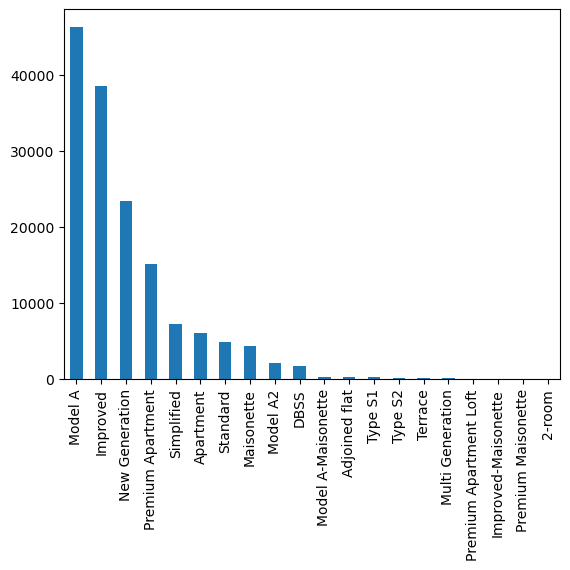

In [152]:
df['flat_model'].value_counts().plot(kind='bar')

<AxesSubplot:>

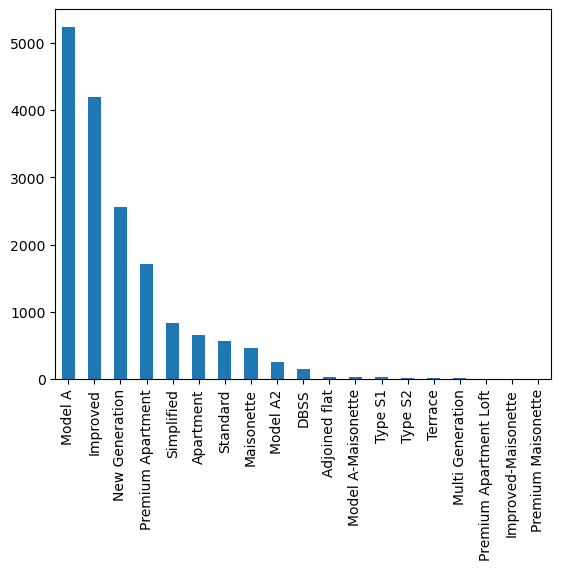

In [153]:
df_pred['flat_model'].value_counts().plot(kind='bar')

- It is observed `2-room` is missing from the predict data
- As the total counts of `2-room` flat in train data is only 4, it is safe to drop the 4 rows so that train and predict data will have the same number of columns after One Hot Encoding.

In [154]:
# find the index of the four '2-room' flats:
df.loc[df['flat_model'] == '2-room']

,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,max_floor_lvl,...,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
33600,SENGKANG,2 ROOM,46.0,2-room,2014,227000.0,2020,1,23,26,...,2494.101230,1,1,81.561509,214.367303,43,0,676.666185,219,0
39505,PASIR RIS,2 ROOM,47.0,2-room,2015,275000.0,2021,3,8,13,...,414.399516,1,0,71.384048,693.104814,52,0,290.650835,208,0
96376,PASIR RIS,2 ROOM,55.0,2-room,1994,250000.0,2020,11,2,10,...,965.052899,0,0,127.751219,323.249487,40,0,368.356657,188,0
150115,PASIR RIS,2 ROOM,55.0,2-room,1994,240000.0,2016,10,2,10,...,965.052899,0,0,127.751219,323.249487,40,0,368.356657,188,0


In [155]:
# drop the 4 rows by indexing:
df.drop([33600, 39505, 96376, 150115], axis=0, inplace=True)

- Now, One Hot Encloding to convert the following features: `town` `flat_type` `flat_model` `planning_area`

In [156]:
df= pd.get_dummies(df, columns=['town', 'flat_type', 'flat_model', 'planning_area'], drop_first=True)

In [157]:
df_pred= pd.get_dummies(df_pred, columns=['town', 'flat_type', 'flat_model','planning_area'], drop_first=True)

In [158]:
df.shape

(150630, 114)

In [159]:
df_pred.shape

(16737, 113)

# 4. Modeling

In [161]:
# import libraries:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
import matplotlib
from sklearn import metrics

#### Create training and testing data:

In [162]:
# set up X and y variables:
X = df.drop(['resale_price'], axis = 'columns')
y = df['resale_price']

In [163]:
# split training and validation sets from train data:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

#### Use the mean value of y - resale price as the base model:

In [164]:
# the predict value for y will be all the same, i.e. mean value of all y-variables in the training set:
y_train_pred_base = np.mean(y_train) 

In [165]:
# the predict value for y will be all the same, i.e. mean value of all y-variables in the validation set:
y_test_pred_base = np.mean(y_test)

In [166]:
# calculate the residual for each y-variable predicted, and mannually calculate RMSE value:
train_resids = y_train - y_train_pred_base
train_base_rmse = np.mean(train_resids**2)**0.5

In [167]:
test_resids = y_test - y_test_pred_base
test_base_rmse = np.mean(test_resids**2)**0.5

In [168]:
print(f'Under the base model without scaling and regulisation, RMSE value for training set is: {train_base_rmse}')

Under the base model without scaling and regulisation, RMSE value for training set is: 143391.5654269674


In [169]:
print(f'Under the base model without scaling and regulisation, RMSE value for training set is: {test_base_rmse}')

Under the base model without scaling and regulisation, RMSE value for training set is: 142959.15743465073


- The RMSE values under the base model are comparably large. At the same time, the model is over simplified. We are not able to interpret which are the more important features affecting the HDB price values using this model.

#### Preprocessing using Standard Scaler: 

In [170]:
# as we take a closer look at the values of each features:
X_train.describe()

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
count,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,...,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000,120504.000000
mean,97.224481,1992.453105,2016.493220,6.581134,8.276522,15.134502,0.190400,0.000108,0.000299,0.000913,...,0.003079,0.024779,0.072993,0.020829,0.070355,0.000158,0.031999,0.000108,0.075101,0.066579
std,24.404378,12.138712,2.750324,3.346071,5.507554,6.229431,0.392619,0.010386,0.017282,0.030199,...,0.055401,0.155452,0.260127,0.142813,0.255745,0.012556,0.175998,0.010386,0.263556,0.249292
min,31.000000,1966.000000,2012.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,1984.000000,2014.000000,4.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,1991.000000,2017.000000,7.000000,8.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112.000000,2001.000000,2019.000000,9.000000,11.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,280.000000,2019.000000,2021.000000,12.000000,50.000000,50.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- It is noticed that numerical values of the features take various forms across wide ranges.
- Scaling acan help features arrive in more digestible form for regression models we would like to apply. ([Source](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=Use%20StandardScaler%20if%20you%20want,okay%20with%20transforming%20your%20data.))
- Ccaling the features before training a linear regression, Ridge, or Lasso model can also interpretability of the model.

In [171]:
# init scaling
ss= StandardScaler()

In [172]:
# fit and transform scaling
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

#### Selection of features by regularizations:

There are three types of regularization to be performed, Ridge (L2), Lasso (L1) and ElasticNet.

Take the steps to find the most suitable model:

- Perform cross validation of the model with a range of possible alphas (Ridge, Lasso and ElasticNet) and L1 ratio (only for Elastic Net). The cross validation score will return the best alpha and L1 ratio accordingly.
- Train the linear model using the best alpha and L1 ratio from step 1. 
- Perform prediction on train and validation set and compute RMSE for each. Values cannot deviate too far as it may signify overfitting.
- Choose the best model by choose the one with lowest RMSE yet does not have significant variance between variance and training set.

#### Ridge Regression:

In [173]:
# set possible values of alphas as ridge regression hyperparameter
alphas = np.logspace(-10,10,200)

# instantiate ridge cross validation to find the best hyperparameter
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', store_cv_values=True)

In [174]:
ridge_cv.fit(X_train_ss, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
        scoring='neg_mean_squared_error', store_cv_values=True)

In [175]:
print(f'Best alpha for Ridge Regression: {ridge_cv.alpha_}')

Best alpha for Ridge Regression: 7.1494289865975915


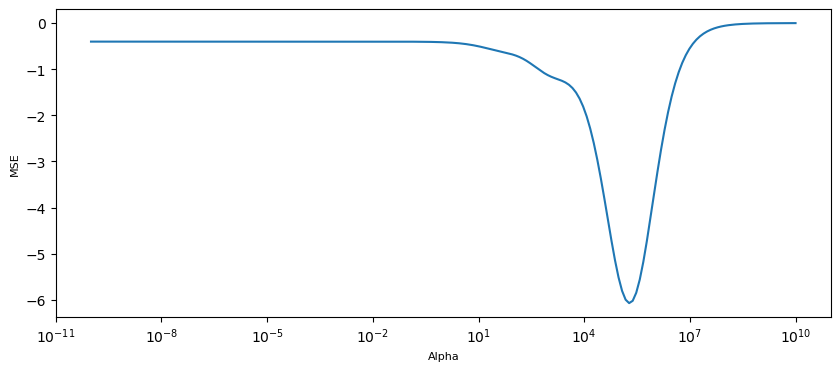

In [176]:
# plot cross validation MSE with respective alpha to understand if we have reached global minimum
ridge_cv_means = [np.mean(cv_mean) for cv_mean in ridge_cv.cv_values_.T]

fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.semilogx(ridge_cv.alphas, ridge_cv_means)

plt.ylabel('MSE')
plt.xlabel('Alpha')

matplotlib.rc('xtick', labelsize=10)
matplotlib.rc('ytick', labelsize=10) 

ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8);

In [177]:
# instantiate Ridge regression model with the best hyperparameter obtained by cross validation step
ridge = Ridge(alpha=ridge_cv.alpha_)

In [178]:
# fit the ridge model on training set:
model_l2 = ridge.fit(X_train_ss, y_train)

In [179]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_l2.score(X_train_ss, y_train)}')

R2 score for training set: 0.8883748834799567


In [180]:
# find the R2 score for the validation set:
print(f'R2 score for validation set: {model_l2.score(X_test_ss, y_test)}')

R2 score for validation set: 0.8868432662853674


In [181]:
# find the predicted y value for training set:
y_train_pred2 = model_l2.predict(X_train_ss) 

In [182]:
rmse_l2_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2))

In [183]:
print(f'RMSE value for training set: {rmse_l2_train}')

RMSE value for training set: 47907.61697145263


In [184]:
# find the predicted y value for validation set:
y_test_pred2 = model_l2.predict(X_test_ss)

In [185]:
rmse_l2_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2))

In [186]:
print(f'RMSE value for validation set: {rmse_l2_test}')

RMSE value for validation set: 48089.71257618016


#### Lasso Regression:

In [189]:
# instantiate lasso cross validation to find the best hyperparameter
lasso_cv = LassoCV(n_alphas=1000)

In [190]:
lasso_cv.fit(X_train_ss, y_train)

LassoCV(n_alphas=1000)

In [191]:
print(f'Best alpha for Lasso Regression: {lasso_cv.alpha_}') 

Best alpha for Lasso Regression: 93.89603273068234


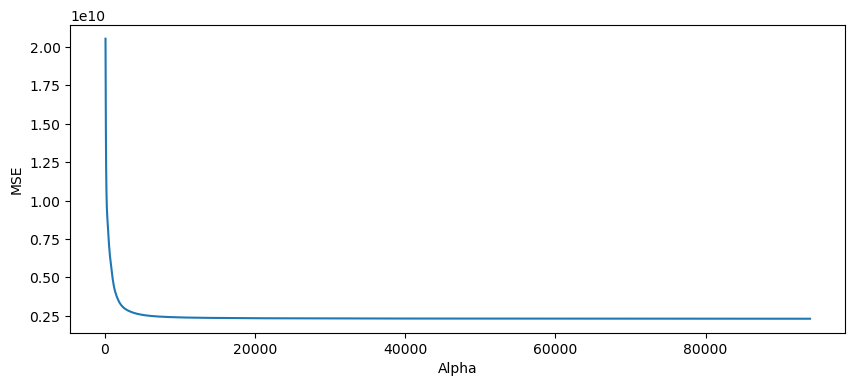

In [192]:
# plot cross validation MSE with respective alpha to understand if we have reached global minimum
lasso_cv_means = [np.mean(cv_alpha) for cv_alpha in lasso_cv.mse_path_]

fig = plt.figure(figsize=(10,4))
ax = plt.gca()
ax.plot(lasso_cv.alphas_, list(reversed(lasso_cv_means)))

plt.ylabel('MSE')
plt.xlabel('Alpha')

matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)

In [193]:
# instantiate Lasso Regression model with the best hyperparameter obtained by cross validation step
lasso = Lasso(alpha=lasso_cv.alpha_)

In [194]:
# Train the model to the training data
model_l1 = lasso.fit(X_train_ss, y_train)

In [195]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_l1.score(X_train_ss, y_train)}')

R2 score for training set: 0.8876597642839735


In [196]:
# find the R2 score for the validation set:
print(f'R2 score for training set: {model_l1.score(X_test_ss, y_test)}')

R2 score for training set: 0.8862878395323495


In [197]:
# find the predicted y value for training set:
y_train_pred1 = model_l1.predict(X_train_ss) 

In [198]:
rmse_l1_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred1))

In [199]:
print(f'RMSE value for training set: {rmse_l1_train}')

RMSE value for training set: 48060.830522674994


In [200]:
# find the predicted y value for validation set:
y_test_pred1 = model_l1.predict(X_test_ss)

In [201]:
rmse_l1_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1))

In [202]:
print(f'RMSE value for validation set: {rmse_l1_test}')

RMSE value for validation set: 48207.59162552418


#### Elastic Net Regression:

In [203]:
# set L1 ratio value
l1_ratio = np.linspace(0.05, 0.95, 5)

In [205]:
# instantiate ElasticNet cross validation to find the best hyperparameter
enet_cv = ElasticNetCV(n_alphas=200, l1_ratio=l1_ratio)

In [206]:
enet_cv.fit(X_train_ss, y_train)

ElasticNetCV(l1_ratio=array([0.05 , 0.275, 0.5  , 0.725, 0.95 ]), n_alphas=200)

In [207]:
print(f'Best alpha for Lasso regression: {enet_cv.alpha_}')

Best alpha for Lasso regression: 98.83792919019196


In [208]:
# Instantiate Elastic Net regression model with the best hyperparameter obtained by cross validation step
enet = ElasticNet(alpha=enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

In [209]:
# train the Elastic Net model to the training data
model_en = enet.fit(X_train_ss, y_train)

In [210]:
# find the R2 score for the training set:
print(f'R2 score for training set: {model_en.score(X_train_ss, y_train)}')

R2 score for training set: 0.49563000034600235


In [211]:
# find the R2 score for the validation set:
print(f'R2 score for training set: {model_en.score(X_test_ss, y_test)}')

R2 score for training set: 0.4964464047190491


In [212]:
# find the predicted y value for training set:
y_train_pred_en = model_en.predict(X_train_ss)

In [213]:
# RMSE value for train data
rmse_en_train = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_en))

In [214]:
print(f'RMSE value for training set: {rmse_en_train}')

RMSE value for training set: 101835.27236183548


In [215]:
# find the predicted y value for validation set:
y_test_pred_en = model_en.predict(X_test_ss)

In [216]:
# RMSE value for val data
rmse_en_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_en))

In [217]:
print(f'RMSE value for validation set: {rmse_en_test}')

RMSE value for validation set: 101445.9773159467


# 5. Model Evaluation

In [218]:
print("Results of Linear Model trainings are as follows: ")
print("1. Ridge Regression: ")
print(f"R2-score on training set: {round((model_l2.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_l2.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_l2_train,1)}")
print(f"RMSE on validation set: {round(rmse_l2_test,1)}\n")
print("2. Lasso Regression: ")
print(f"R2-score on training set: {round((model_l1.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_l1.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_l1_train,1)}")
print(f"RMSE on validation set: {round(rmse_l1_test,1)}\n")
print("3. ElasticNet Regression: ")
print(f"R2-score on training set: {round((model_en.score(X_train_ss, y_train)),3)}")
print(f"R2-score on validation set: {round((model_en.score(X_test_ss, y_test)),3)}")
print(f"RMSE on training set : {round(rmse_en_train,1)}")
print(f"RMSE on validation set: {round(rmse_en_test,1)}\n")

Results of Linear Model trainings are as follows: 
1. Ridge Regression: 
R2-score on training set: 0.888
R2-score on validation set: 0.887
RMSE on training set : 47907.6
RMSE on validation set: 48089.7

2. Lasso Regression: 
R2-score on training set: 0.888
R2-score on validation set: 0.886
RMSE on training set : 48060.8
RMSE on validation set: 48207.6

3. ElasticNet Regression: 
R2-score on training set: 0.496
R2-score on validation set: 0.496
RMSE on training set : 101835.3
RMSE on validation set: 101446.0



#### Ridge Regression appears to be performing best among regulisations. Let's find out how far are the predicted values away from the actual values for the training and validation sets.

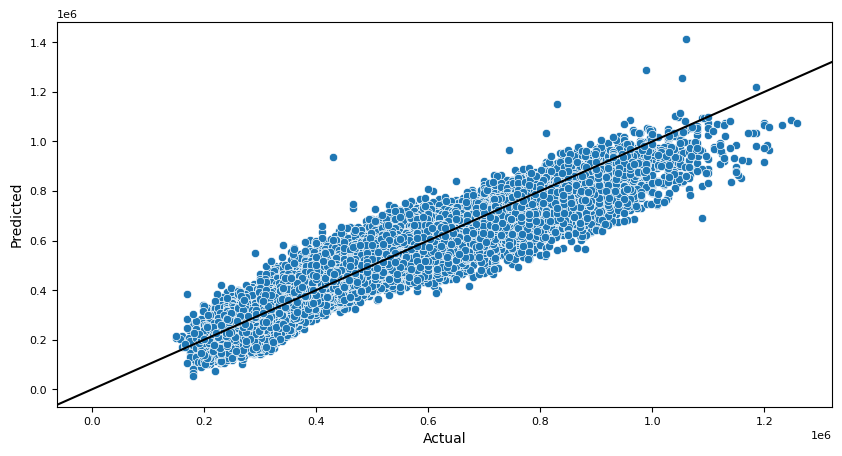

In [219]:
# scatter plot best model prediction results on training set:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(
    y=y_train_pred2,
    x=y_train,
    ax=ax
)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.axline((0,0),(1,1),color='black')

matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)

- For the training set, it is observed that the predicted values are largely centred along the y=x line, with only a few prediction outliers above the actual values.

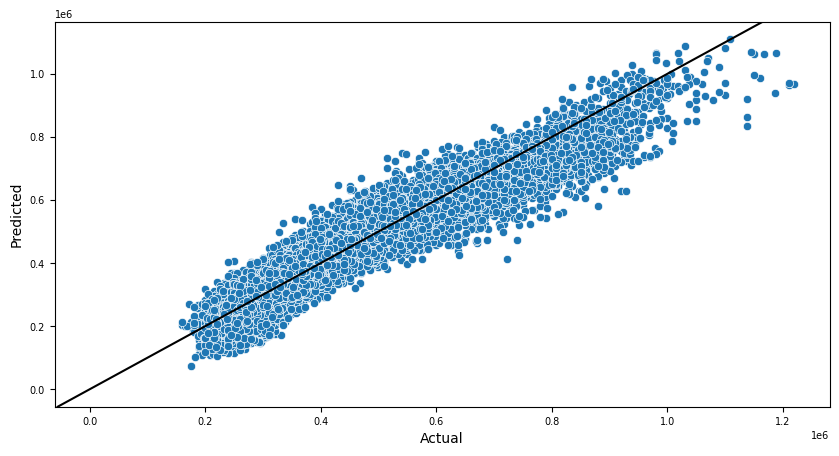

In [220]:
# scatter plot best model prediction results on validation set:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(
    y=y_test_pred2,
    x=y_test,
    ax=ax
)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.axline((0,0),(1,1),color='black')

matplotlib.rc('xtick', labelsize=7)
matplotlib.rc('ytick', labelsize=7) 

ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10);

- For the validation set, it is interesting to observe a few outliers of predicted values below the the actual values.
- In overall, the plots are closely fitting the y=x line. This indicate a good fittin of the model on the validation set.

#### Interpretation of the coefficients:

Scaling the features before training a linear regression, Ridge, or Lasso model can affect the interpretation of the model in several ways:

- Coefficient magnitudes: Scaling the features can affect the magnitude of the coefficients in the model. If the features have different scales, some coefficients may be very large or very small compared to others, which can make it difficult to compare the relative importance of the features. Scaling the features can help to ensure that the coefficients have similar magnitudes, which makes it easier to compare their importance.

- Regularization: In Ridge and Lasso regression, the regularization term depends on the magnitude of the coefficients, so scaling the features can affect the magnitude of the coefficients and the magnitude of the regularization term. This can in turn affect the model's stability and the feature selection properties of the model.

- Feature importances: The coefficients in linear regression, Ridge, and Lasso models give you an idea of the importance of each feature in explaining the variation in the target variable. However, the interpretation of the coefficients can be affected by the scale of the features. Scaling the features can help to ensure that the coefficients have a meaningful interpretation in terms of the original units of the features.

In [221]:
# create a dataframe including all features taken by the model, and the corresponding coefficients:
df_coef = pd.DataFrame(X.columns, model_l2.coef_)

Text(0.5, 1.0, 'Coefficients of Features')

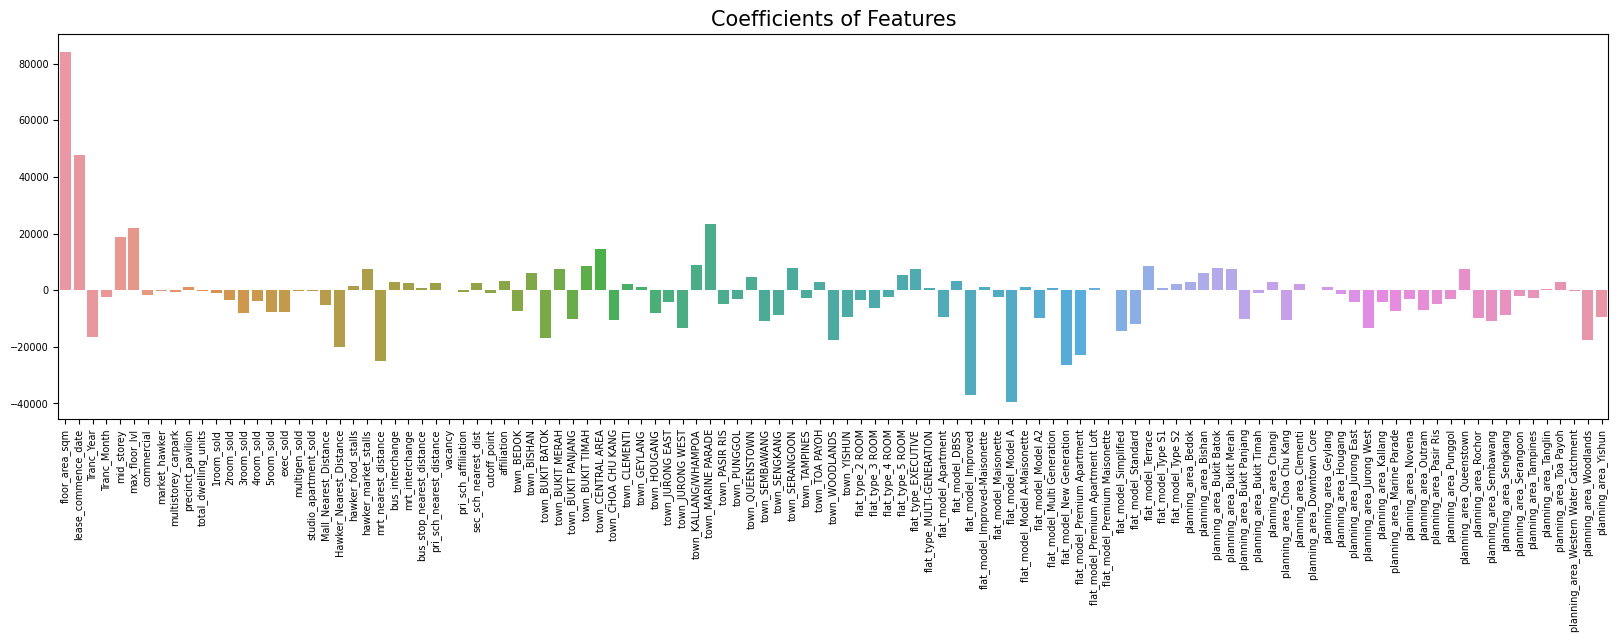

In [222]:
# plot a bar chart indicating the magnitude of each feature:
plt.figure(figsize=(20,5))
fig=sns.barplot(data=df_coef, x= X.columns, y=model_l2.coef_)
fig.set_xticklabels(labels=X.columns, rotation=90)
plt.title('Coefficients of Features', fontsize=15)

Factors having positive correlations with the price:
- The `max_floor_lvl` together with `mid_storey` impact the price of a flat positively as well. `max_floor_lvl` is seen with more weightage than the floor level. It could be due to the fact that many high rise flats are built in prime locations. 
- This brings to another factor that has a positive relationship with the price, the location. Among all town locations, `town_MARINE PARADE` seems to be the best in pricing.

Factors having negative correlations with the price:
- It is interesting to see the feature `flat_model_Model A` impacts the HDB flat price inversely. Model A flats generally have lower price than the others. It could be due to the fact that Model A flats are generally old. ([Source](https://www.nas.gov.sg/archivesonline/data/pdfdoc/HDB19810520.pdf))
- Aside, the distance to amenities also affect the HDB resale flat inversely. The shorter distance to MRT and Hawkers, the higher price for the flat. 

In [223]:
# for a better understanding of the top features which have more impact on the resale price, let's sort the coefficients based on the absolute values:
coeffs = pd.DataFrame({
    'Feature' : X.columns,
    'Coefficient' : model_l2.coef_,
    'Absolute Coefficient' : np.abs(model_l2.coef_)
})

sorted_coeffs = coeffs.sort_values('Absolute Coefficient', ascending=False)

In [230]:
# let's find the top 5 features among all:
top_coeffs = sorted_coeffs.iloc[0:5]

In [231]:
top_coeffs

,Feature,Coefficient,Absolute Coefficient
0,floor_area_sqm,84224.258351,84224.258351
1,lease_commence_date,47654.279626,47654.279626
69,flat_model_Model A,-39404.904709,39404.904709
66,flat_model_Improved,-37160.551822,37160.551822
73,flat_model_New Generation,-26292.328234,26292.328234


Text(0.5, 1.0, 'Top 5 Features')

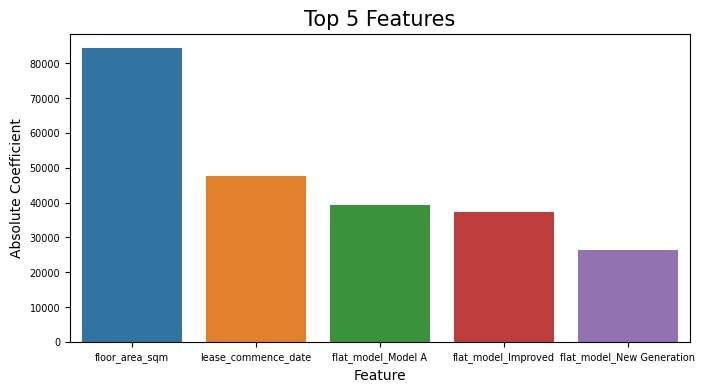

In [237]:
# visualise the features using a barplot:
plt.figure(figsize=(8,4))
fig=sns.barplot(data=top_coeffs, x= 'Feature', y='Absolute Coefficient')
plt.title('Top 5 Features', fontsize=15)

- The most impactful feature is: `floor_area_sqm`. HDB flats with bigger floor areas are sold at higher price.
- The 2nd most important feature is `lease_commence_date`. The later the lease commence date, the better price for the HDB flat.
- The 3rd-5th belong to the same group of features `flat_model`. 

# 6. Prediction

In [238]:
# look at the cleaned and preprocessed predict data:
df_pred.head(3)

,floor_area_sqm,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,max_floor_lvl,commercial,market_hawker,multistorey_carpark,precinct_pavilion,...,planning_area_Rochor,planning_area_Sembawang,planning_area_Sengkang,planning_area_Serangoon,planning_area_Tampines,planning_area_Tanglin,planning_area_Toa Payoh,planning_area_Western Water Catchment,planning_area_Woodlands,planning_area_Yishun
0,84.0,1987,2012,11,8,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,112.0,2008,2019,8,5,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,68.0,1980,2013,10,8,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [239]:
# apply scaling on X variables of the predict data:
X_pred_ss = ss.transform(df_pred)

In [240]:
# perform prediction based on the best model 
y_pred_final = pd.Series(model_l2.predict(X_pred_ss), name='resale_price')

In [241]:
# open the original prediction data with transaction id:
df_ori = pd.read_csv('../datasets/test.csv', low_memory=False)

In [242]:
# create a dataframe for the result with the corresponding transaction id:
y_result = pd.concat([df_ori['id'], y_pred_final], axis=1)

In [243]:
# check the headers to make sure it's aligned with the submission format:
y_result.head(3)

,id,resale_price
0,114982,368582.290313
1,95653,513555.998724
2,40303,349754.979793


In [244]:
# change the result columns to the names as required for submission:
result = y_result.rename(columns={'id': 'Id', 'resale_price': 'Predicted'})

In [245]:
# save the final result to csv file:
result.to_csv('../datasets/result.csv', index=False)

#### Submission of the final model to Kaggle:

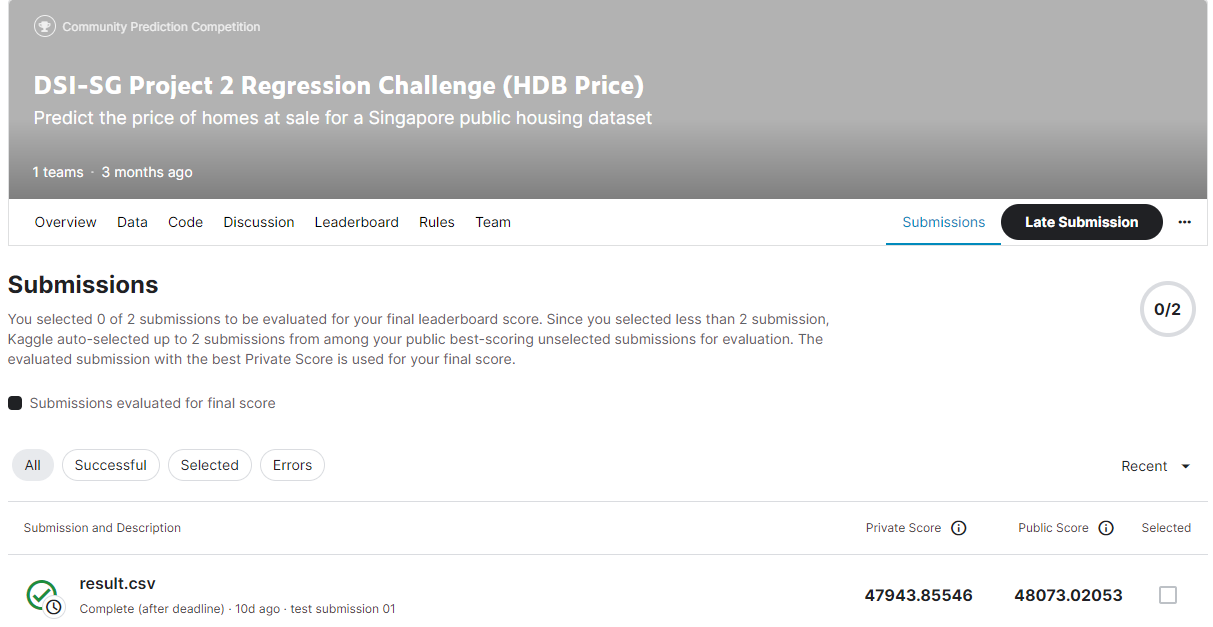

# 7. Conclusions and Recommendations

We start with a dataset containing 80 sets with the goal to create accurate yet generalize prediction model. After performing data cleaning, feature engineering, feature elimination (through majority counts, collinearity and regularization), we manage to create a model with relatively low bias score and generelized well across different dataset.

Even more importantly than being able to create a prediction model is the insight on which parameter will strongly affect the House selling price. For example, a house owner may want to invest certain amount of money to improve overall condition of the house or increase the size of garage to fit more than a car before selling the house. Understanding from the model also will provide a good estimate of how much money should the house owner invest on to make the investment worthwhile considering the potential return.

#### Model Limitation and Recommendations for Further Studies:

- The choice of Ordinal Encoding to convert categorical feature numeric prevent us to obtain insight on particular category in the feature is important on the Sale Price. For example, if we know that exterior quality is important, than what kind of exterior quality a house owner need to renovate his house to to maximize his potential sale price.
- More selection of categorical variables into the pool to see which other variable may be significant since Lasso regularization has reduced total variable from 30 to 19.
- To examine closer on the five assumptions of linearity regression and if linear regression model is well-poised for this problem.

# 8. References

- https://dollarsandsense.sg/5-types-hdb-flats-not-longer-built-singapore/
- https://www.99.co/
- https://www.knowledgehut.com/blog/data-science/linear-regression-for-machine-learning
- https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/
- https://www.straitstimes.com/singapore/housing/number-of-hdb-resale-flats-sold-in-q2-2019-grew-nearly-30
- https://towardsdatascience.com/understanding-and-predicting-resale-hdb-flat-prices-in-singapore-1853ec7069b0
- https://www.straitstimes.com/multimedia/graphics/2021/06/singapore-million-dollar-hdb/index.html?shell